<a href="https://colab.research.google.com/github/jescalada/Tensorflow-colabs/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks in TensorFlow
There are many definitions for a regression problem. We will simplify to: Predicting a numerical variable based on a combination of other variables.

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


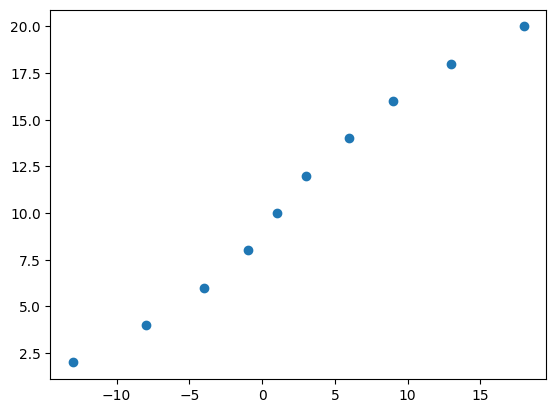

In [7]:
# Create some data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-13., -8., -4., -1., 1., 3., 6., 9., 13., 18.])

# Create labels
y = np.array([2., 4., 6., 8., 10., 12., 14., 16., 18., 20.])

plt.scatter(X, y)

# Input and output shapes


In [9]:
# Create a demo tensor to predict the price of a house
house_info = tf.constant(["beds", "baths", "garages"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'beds', b'baths', b'garages'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

# Steps in modellibg with TensorFlow
1. **Creating a model**: Define the input and output layers, as well as the hidden layers of the deep learning model
2. **Compiling the model**: Define the **loss function**, which tells the model how wrong it is, define the **optimizer** which tells the model how to improve the patterns, and define **evaluation metrics** in order to interpret the performance of the model itself
3. **Fitting the model**: Letting the model try to find patterns between X and Y (Features and labels)

In [14]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000)



Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 18.8907 - mae: 18.8907
Epoch 2/1000
1/1 [==============================] - 0s 20ms/step - loss: 18.4515 - mae: 18.4515
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 18.0123 - mae: 18.0123
Epoch 4/1000
1/1 [==============================] - 0s 18ms/step - loss: 17.5731 - mae: 17.5731
Epoch 5/1000
1/1 [==============================] - 0s 26ms/step - loss: 17.1339 - mae: 17.1339
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 16.6947 - mae: 16.6947
Epoch 7/1000
1/1 [==============================] - 0s 18ms/step - loss: 16.2555 - mae: 16.2555
Epoch 8/1000
1/1 [==============================] - 0s 13ms/step - loss: 15.8163 - mae: 15.8163
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 15.3771 - mae: 15.3771
Epoch 10/1000
1/1 [==============================] - 0s 22ms/step - loss: 14.9379 - mae: 14.9379
Epoch 11/1000
1/1 [======================

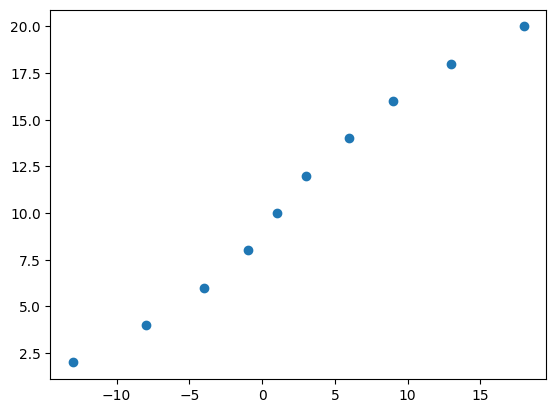

In [17]:
plt.scatter(X, y)

In [20]:
model.predict([22.])

1/1 [==============================] - 0s 38ms/step


array([[22.737358]], dtype=float32)

In [23]:
model.predict([24])

1/1 [==============================] - 0s 43ms/step


array([[24.01857]], dtype=float32)

1/1 [==============================] - 0s 48ms/step


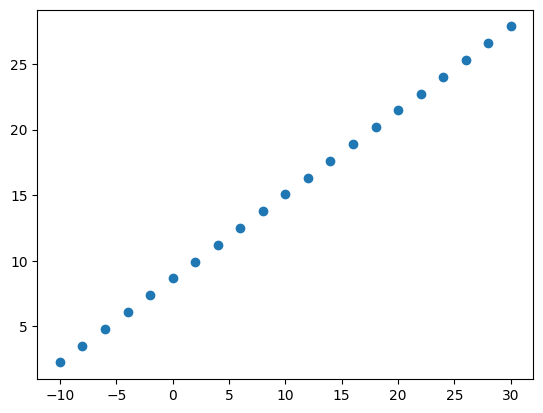

In [25]:
predictions1 = [(x, model.predict([x])) for x in range(-10, 32, 2)]
pairs = list(zip(*predictions1))
plt.scatter(pairs[0], pairs[1])